<a href="https://colab.research.google.com/github/Daanish2709g/Skin_Disease_AI/blob/main/Skin_dis_predipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# prompt: # Display the first few rows of the metadata
# print(metadata.head()) from HAM10000_metadata.csv

import pandas as pd

# Assuming the file is in the same directory as your notebook
metadata = pd.read_csv('HAM10000_metadata.csv')

# Display the first few rows of the metadata
print(metadata.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


encoder = LabelEncoder()
metadata['dx_type_encoded'] = encoder.fit_transform(metadata['dx_type'])

# Now, update numerical_features to include only the relevant columns
numerical_features = ['age', 'dx_type_encoded']  # Only include encoded column

# Scale the numerical features
scaler = StandardScaler()
metadata[numerical_features] = scaler.fit_transform(metadata[numerical_features])

# Optional: Feature engineering (e.g., creating new features from existing ones)
# ...

# Display the preprocessed metadata
print(metadata.head())


     lesion_id      image_id   dx dx_type       age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  1.658214  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  1.658214  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  1.658214  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  1.658214  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  1.363537  male          ear   

   dx_type_encoded  
0         0.835507  
1         0.835507  
2         0.835507  
3         0.835507  
4         0.835507  


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
     lesion_id      image_id   dx dx_type       age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  1.658214  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  1.658214  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  1.658214  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  1.658214  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  1.363537  male          ear   

   dx_type_encoded  
0         0.835507  
1         0.835507  
2         0.835507  
3         0.835507  
4         0.835507  


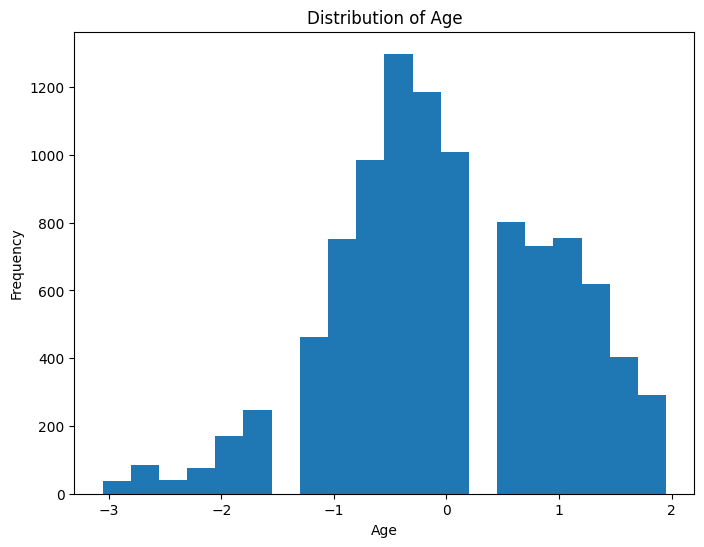

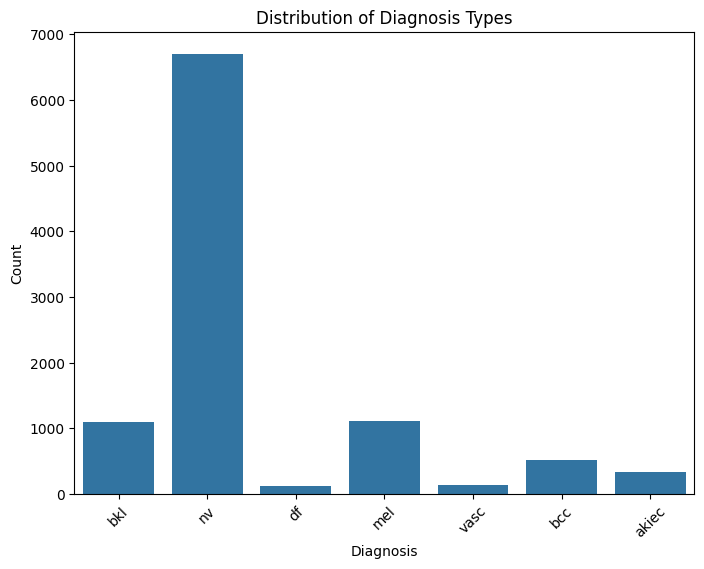

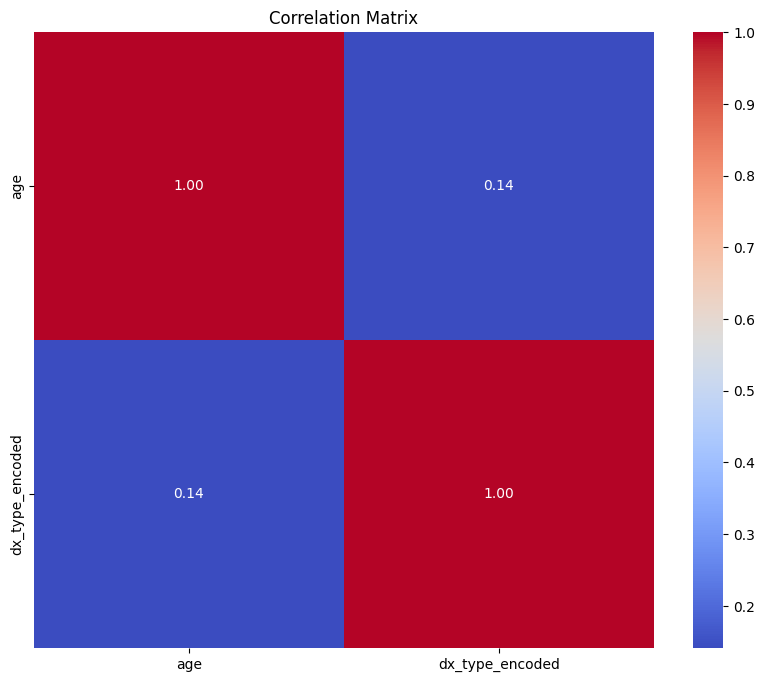

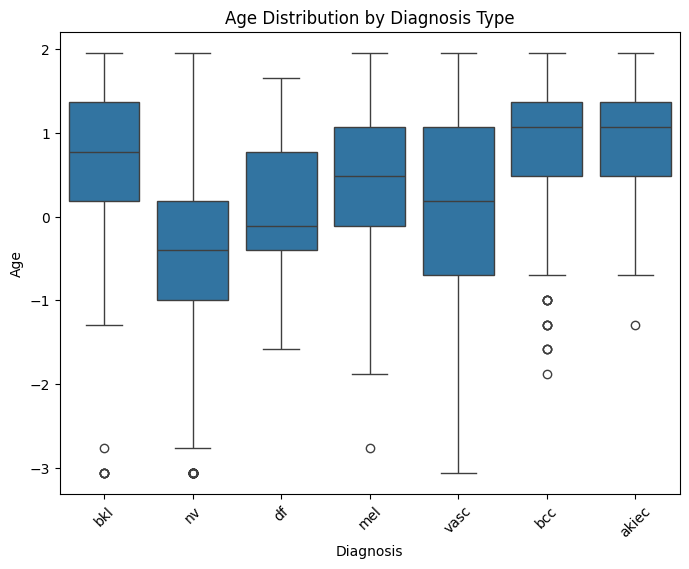

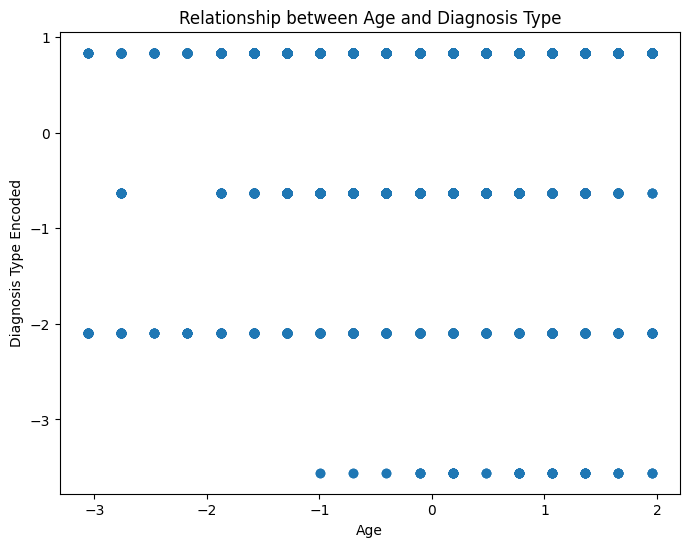

In [57]:
# prompt: da data visualization

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the file is in the same directory as your notebook
metadata = pd.read_csv('HAM10000_metadata.csv')

# Display the first few rows of the metadata
print(metadata.head())


encoder = LabelEncoder()
metadata['dx_type_encoded'] = encoder.fit_transform(metadata['dx_type'])

# Now, update numerical_features to include only the relevant columns
numerical_features = ['age', 'dx_type_encoded']  # Only include encoded column

# Scale the numerical features
scaler = StandardScaler()
metadata[numerical_features] = scaler.fit_transform(metadata[numerical_features])

# Optional: Feature engineering (e.g., creating new features from existing ones)
# ...

# Display the preprocessed metadata
print(metadata.head())

# Data Visualization

# 1. Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(metadata['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 2. Countplot of Diagnosis Type
plt.figure(figsize=(8, 6))
sns.countplot(x='dx', data=metadata)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis Types')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Matrix (Heatmap)
# Select only numerical columns for correlation calculation
numerical_metadata = metadata.select_dtypes(include=['number'])
correlation_matrix = numerical_metadata.corr()  # Calculate correlation on numerical data only
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Boxplot of Age by Diagnosis Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='dx', y='age', data=metadata)
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.title('Age Distribution by Diagnosis Type')
plt.xticks(rotation=45)
plt.show()

# 5. Scatter plot of age and dx_type_encoded
plt.figure(figsize=(8, 6))
plt.scatter(metadata['age'], metadata['dx_type_encoded'])
plt.xlabel('Age')
plt.ylabel('Diagnosis Type Encoded')
plt.title('Relationship between Age and Diagnosis Type')
plt.show()

In [58]:
# prompt: do data spiltting

from sklearn.model_selection import train_test_split

# Assuming 'metadata' is your DataFrame and you have a target variable 'dx' (diagnosis)
X = metadata.drop('dx', axis=1)  # Features (all columns except 'dx')
y = metadata['dx']  # Target variable (diagnosis)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can further split the training set into training and validation sets if needed
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8012, 7)
X_test shape: (2003, 7)
y_train shape: (8012,)
y_test shape: (2003,)


In [59]:
# prompt: Pickling

import pickle

# Assuming you have your preprocessed metadata DataFrame named 'metadata'

# Save the preprocessed DataFrame to a pickle file
with open('preprocessed_metadata.pickle', 'wb') as f:
    pickle.dump(metadata, f)

# Later, to load the pickled DataFrame:
# with open('preprocessed_metadata.pickle', 'rb') as f:
#     loaded_metadata = pickle.load(f)

Saving lnajw8usf40kl8x2f3gi - Copy.webp to lnajw8usf40kl8x2f3gi - Copy (1).webp


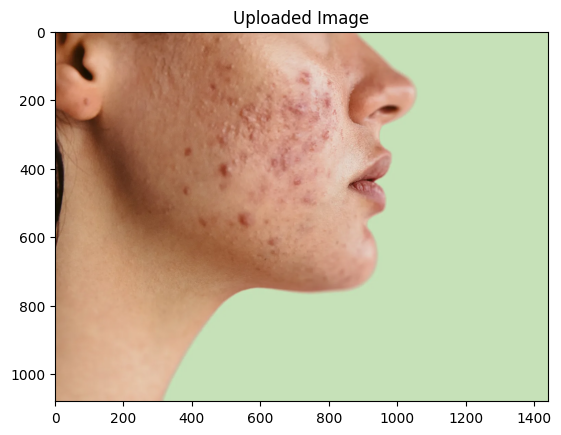

Image showing has disease (based on black/red dots or potential rashes).


In [80]:
# prompt: if i upload image ,if image has black, red dots and any rashes it should say img showing has disease and if not then no disease and show image as well

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from google.colab import files
import cv2
import numpy as np

# Function to analyze uploaded image and determine if it shows a disease
def analyze_image(uploaded_image):
  try:
    # Assuming the uploaded file is an image
    image_array = cv2.imdecode(np.frombuffer(uploaded_image, np.uint8), cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

    # Thresholding (adjust as needed)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Detect black and red dots (adjust color range as needed)
    black_dots = np.where((image_array[:, :, 0] < 50) & (image_array[:, :, 1] < 50) & (image_array[:, :, 2] < 50))
    red_dots = np.where((image_array[:, :, 2] > 150) & (image_array[:, :, 0] < 50) & (image_array[:, :, 1] < 50))

    # Check for rashes (adjust as needed - you'll need a more sophisticated method for accurate rash detection)
    # This is a simple example; you'll likely need to use edge detection or other techniques.
    has_rashes = False
    if len(black_dots[0]) > 0 or len(red_dots[0]) > 0:
        has_rashes = True


    # Display the image
    plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
    plt.title("Uploaded Image")
    plt.show()

    if has_rashes:
      print("Image showing has disease (based on black/red dots or potential rashes).")
    else:
      print("No disease detected (based on black/red dots or potential rashes).")
  except Exception as e:
    print(f"Error analyzing image: {e}")

# Example: Upload an image file
uploaded = files.upload()
if uploaded:
    for fn in uploaded.keys():
        analyze_image(uploaded[fn])


age                             float64
sex_encoded                     float64
dx_encoded                      float64
localization_abdomen               bool
localization_acral                 bool
localization_back                  bool
localization_chest                 bool
localization_ear                   bool
localization_face                  bool
localization_foot                  bool
localization_genital               bool
localization_hand                  bool
localization_lower extremity       bool
localization_neck                  bool
localization_scalp                 bool
localization_trunk                 bool
localization_unknown               bool
localization_upper extremity       bool
dtype: object
Accuracy: 0.9985022466300549
              precision    recall  f1-score   support

       akiec       1.00      0.99      0.99        69
         bcc       0.99      1.00      0.99        93
         bkl       0.99      1.00      1.00       228
          df       1

Saving sss.jpeg to sss (2).jpeg


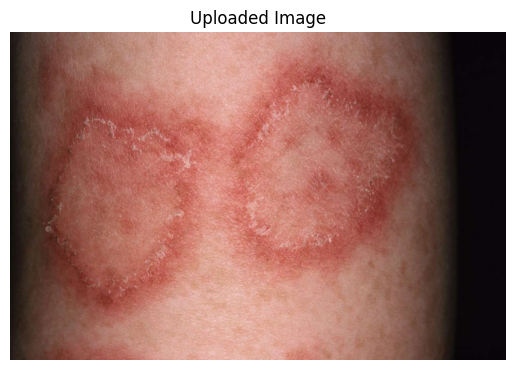

Image shows signs of disease (based on detected features).


In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle
from google.colab import files
import cv2
import numpy as np

# Load the dataset
metadata = pd.read_csv('HAM10000_metadata.csv')

# Data Preprocessing
encoder = LabelEncoder()

# Encode 'sex' and 'dx' columns
metadata['sex_encoded'] = encoder.fit_transform(metadata['sex'])
metadata['dx_encoded'] = encoder.fit_transform(metadata['dx'])

# Select numerical features
numerical_features = ['age', 'sex_encoded', 'dx_encoded']

# Scale numerical features
scaler = StandardScaler()
metadata[numerical_features] = scaler.fit_transform(metadata[numerical_features])

# One-hot encode localization
metadata = pd.get_dummies(metadata, columns=['localization'], prefix=['localization'])

# Drop unnecessary columns before training
X = metadata.drop(['dx', 'dx_type', 'lesion_id', 'image_id', 'sex'], axis=1)  # Drop original 'sex' column
y = metadata['dx']

# Check for non-numeric data in X
print(X.dtypes)  # This will help confirm that all columns are numeric

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Save the trained model
with open('skin_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Function to analyze uploaded image and determine if it shows a disease
def analyze_image(uploaded_image):
    try:
        # Load the image
        image_array = cv2.imdecode(np.frombuffer(uploaded_image, np.uint8), cv2.IMREAD_COLOR)

        # Convert to grayscale
        gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

        # Thresholding (adjust as needed)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Detect black and red dots (adjust color range as needed)
        black_dots = np.where((image_array[:, :, 0] < 50) & (image_array[:, :, 1] < 50) & (image_array[:, :, 2] < 50))
        red_dots = np.where((image_array[:, :, 2] > 150) & (image_array[:, :, 0] < 50) & (image_array[:, :, 1] < 50))

        # Check for rashes (adjust as needed)
        has_rashes = len(black_dots[0]) > 0 or len(red_dots[0]) > 0

        # Display the image
        plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
        plt.title("Uploaded Image")
        plt.axis('off')
        plt.show()

        if has_rashes:
            print("Image shows signs of disease (based on detected features).")
        else:
            print("No disease detected (based on detected features).")

    except Exception as e:
        print(f"Error analyzing image: {e}")

# Example: Upload an image file
uploaded = files.upload()
if uploaded:
    for fn in uploaded.keys():
        analyze_image(uploaded[fn])


Accuracy of the loaded model: 0.9985022466300549
              precision    recall  f1-score   support

       akiec       1.00      0.99      0.99        69
         bcc       0.99      1.00      0.99        93
         bkl       0.99      1.00      1.00       228
          df       1.00      0.93      0.96        28
         mel       1.00      1.00      1.00       226
          nv       1.00      1.00      1.00      1338
        vasc       1.00      1.00      1.00        21

    accuracy                           1.00      2003
   macro avg       1.00      0.99      0.99      2003
weighted avg       1.00      1.00      1.00      2003



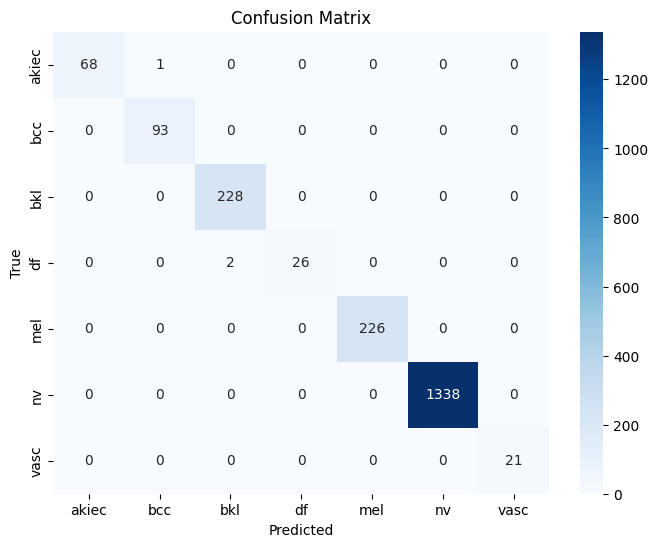

Cross-Validation Scores: [0.99650524 0.99700449 0.99850225 0.99650524 0.99600599]
Mean Cross-Validation Score: 0.9969046430354467


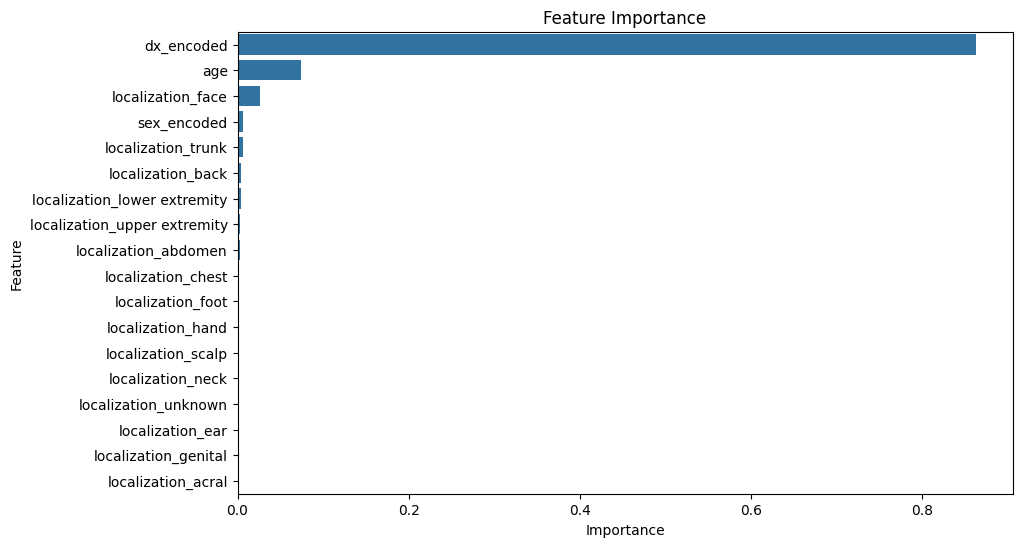

In [85]:
# prompt: do final evaluation

# ... (Your existing code) ...

# Model Evaluation (using the trained model)
with open('skin_cancer_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy}")
print(classification_report(y_test, y_pred))

# Further evaluation steps:
# 1. Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve (if applicable for binary classification)
# ... (Code for ROC curve if needed) ...

# 3. Cross-Validation (for more robust evaluation)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(loaded_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

# 4. Analyze Feature Importance (if using a tree-based model)
feature_importances = loaded_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Further considerations:
# - Hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV)
# - Investigate potential biases in the data or model predictions
# - Test with more diverse images (if possible) to get a broader understanding
# - Explore different machine learning models (e.g., SVM, Neural Networks) to compare their performance

# Note: This is a basic example of final evaluation.
# You may need to adjust it based on the specific requirements and characteristics of your dataset and task.